<a href="https://colab.research.google.com/github/Cloud-Dark/Ransomware_Classification/blob/main/Ransomware_Classification_(6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
! python ‐‐version 

python3: can't open file '‐‐version': [Errno 2] No such file or directory


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# root_path = '/content/drive/MyDrive/irhammaulani/Kuliah/S2/KBJ/tugas_paper'

In [ ]:
# data = pd.read_csv("/content/drive/MyDrive/irhammaulani/Kuliah/S2/KBJ/tugas_paper/BitcoinHeistData.csv", delimiter = ",")

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00526/data.zip
!unzip data.zip
!sudo pip install imbalanced-learn

--2022-11-07 15:59:04--  https://archive.ics.uci.edu/ml/machine-learning-databases/00526/data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116104947 (111M) [application/x-httpd-php]
Saving to: ‘data.zip’

data.zip            100%[===================>] 110.73M  20.3MB/s    in 6.2s    

2022-11-07 15:59:11 (17.9 MB/s) - ‘data.zip’ saved [116104947/116104947]

Archive:  data.zip
  inflating: BitcoinHeistData.csv    
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data = pd.read_csv("BitcoinHeistData.csv", delimiter = ",")

In [ ]:
data.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,princetonLocky


In [ ]:
data.tail()

,address,year,day,length,weight,count,looped,neighbors,income,label
2916692,12D3trgho1vJ4mGtWBRPyHdMJK96TRYSry,2018,330,0,0.111111,1,0,1,1.255809e+09,white
2916693,1P7PputTcVkhXBmXBvSD9MJ3UYPsiou1u2,2018,330,0,1.000000,1,0,1,4.409699e+07,white
2916694,1KYiKJEfdJtap9QX2v9BXJMpz2SfU4pgZw,2018,330,2,12.000000,6,6,35,2.398267e+09,white
2916695,15iPUJsRNZQZHmZZVwmQ63srsmughCXV4a,2018,330,0,0.500000,1,0,1,1.780427e+08,white
2916696,3LFFBxp15h9KSFtaw55np8eP5fv6kdK17e,2018,330,144,0.073972,6800,0,2,1.123500e+08,white


In [ ]:
# x, y = data.drop(['address', 'label'], axis=1), data.filter(['label'])

# Change label if white == 0 else  === 1

In [ ]:
data["label"] = np.where(data["label"] == "white", 0, 1)
data

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,1.000500e+08,1
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,1.000000e+08,1
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,2.000000e+08,1
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,7.120000e+07,1
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,2.000000e+08,1
...,...,...,...,...,...,...,...,...,...,...
2916692,12D3trgho1vJ4mGtWBRPyHdMJK96TRYSry,2018,330,0,0.111111,1,0,1,1.255809e+09,0
2916693,1P7PputTcVkhXBmXBvSD9MJ3UYPsiou1u2,2018,330,0,1.000000,1,0,1,4.409699e+07,0
2916694,1KYiKJEfdJtap9QX2v9BXJMpz2SfU4pgZw,2018,330,2,12.000000,6,6,35,2.398267e+09,0
2916695,15iPUJsRNZQZHmZZVwmQ63srsmughCXV4a,2018,330,0,0.500000,1,0,1,1.780427e+08,0


In [ ]:
# x

,year,day,length,weight,count,looped,neighbors,income
0,2017,11,18,0.008333,1,0,2,1.000500e+08
1,2016,132,44,0.000244,1,0,1,1.000000e+08
2,2016,246,0,1.000000,1,0,2,2.000000e+08
3,2016,322,72,0.003906,1,0,2,7.120000e+07
4,2016,238,144,0.072848,456,0,1,2.000000e+08
...,...,...,...,...,...,...,...,...
2916692,2018,330,0,0.111111,1,0,1,1.255809e+09
2916693,2018,330,0,1.000000,1,0,1,4.409699e+07
2916694,2018,330,2,12.000000,6,6,35,2.398267e+09
2916695,2018,330,0,0.500000,1,0,1,1.780427e+08


In [ ]:
# y

,label
0,1
1,1
2,1
3,1
4,1
...,...
2916692,0
2916693,0
2916694,0
2916695,0


In [ ]:
# feat = data.drop(['address', 'label'], axis=1)

# Labels are the values we want to predict
target = np.array(data.filter(['label']))
# Remove the labels from the features
# axis 1 refers to the columns
features= data.drop(['address', 'label'], axis = 1)

feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(missing_values=np.nan)
# fit on the dataset
imputer.fit(features)
features_trans = imputer.transform(features)


In [ ]:
# @title #SMOTE
print("Jumlah Transaksi Normal " + str(len(data.loc[data['label']  ==  0])))
print("Jumlah Transaksi Terindikasi Ransom ware " + str(len(data.loc[data['label']  !=  0])))


from sklearn.model_selection import train_test_split
  
# split into 70:30 ration
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
  
print('Before OverSampling, the shape of features_trans: {}'.format(str(features_trans.shape)))
print('Before OverSampling, the shape of target: {} \n'.format(target.shape))
print("Before OverSampling, counts of label '1': ", str(sum(target == 1)))
print("Before OverSampling, counts of label '0': ", str(sum(target == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X, y = sm.fit_resample(features_trans, target)
  
print('After OverSampling, the shape of X: {}'.format(str(X.shape)))
print('After OverSampling, the shape of y: {} \n'.format(y.shape))

print("After OverSampling, counts of label '1':", str(sum(y == 1)))
print("After OverSampling, counts of label '0':", str(sum(y == 0)))
# rasio perban

Jumlah Transaksi Normal 2875284
Jumlah Transaksi Terindikasi Ransom ware 41413
Before OverSampling, the shape of features_trans: (2916697, 8)
Before OverSampling, the shape of target: (2916697, 1) 

Before OverSampling, counts of label '1':  [41413]
Before OverSampling, counts of label '0':  [2875284]
After OverSampling, the shape of X: (5750568, 8)
After OverSampling, the shape of y: (5750568,) 

After OverSampling, counts of label '1': 2875284
After OverSampling, counts of label '0': 2875284


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=8)

x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.50, random_state=8)

In [ ]:
!pip install git+https://github.com/dreamquark-ai/tabnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/dreamquark-ai/tabnet to /tmp/pip-req-build-kd99_30k
  Running command git clone -q https://github.com/dreamquark-ai/tabnet /tmp/pip-req-build-kd99_30k
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pytorch-tabnet: filename=pytorch_tabnet-4.0-py3-none-any.whl size=41793 sha256=90c3a10ee3a0c9528c323ac53032f5c5d91e6f473b6a88eba944fb5b60382e2c
  Stored in directory: /tmp/pip-ephem-wheel-cache-sgnzq9sn/wheels/08/0a/8a/ebb5cbdd84ca2cc39f4af3e9bf3fa0fb5650b4e8d54777dc1b
Successfully built pytorch-tabnet


In [ ]:
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

In [ ]:
# define the model
from sklearn.preprocessing import LabelEncoder
clf1_nopreproc = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax' # "sparsemax"
                      )

# y_train = y_train.ravel().reshape(1, -1)
# y_val  = LabelEncoder().fit_transform(np.ravel(y_val))
# x_val  = LabelEncoder().fit_transform(np.ravel(y_val))
y_train = y_train.flatten()

clf = TabNetClassifier()  #TabNetRegressor()

clf.fit(
  x_train, y_train,
  eval_set=[(x_test, y_test)],
  eval_metric=['auc'],
  max_epochs=150 , patience=15,
  batch_size=128, virtual_batch_size=64,
  num_workers=0,
  weights=1,
  drop_last=False
)



/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.33582 | val_0_auc: 0.64721 |  0:09:51s
epoch 1  | loss: 0.28795 | val_0_auc: 0.74341 |  0:19:21s
epoch 2  | loss: 0.26892 | val_0_auc: 0.77796 |  0:28:47s
epoch 3  | loss: 0.26394 | val_0_auc: 0.76447 |  0:38:25s
epoch 4  | loss: 0.25838 | val_0_auc: 0.7687  |  0:48:05s
epoch 5  | loss: 0.25419 | val_0_auc: 0.77549 |  0:57:29s
epoch 6  | loss: 0.25554 | val_0_auc: 0.78722 |  1:06:56s
epoch 7  | loss: 0.252   | val_0_auc: 0.74072 |  1:16:20s
epoch 8  | loss: 0.24909 | val_0_auc: 0.74896 |  1:25:51s
epoch 9  | loss: 0.24795 | val_0_auc: 0.77561 |  1:35:23s
epoch 10 | loss: 0.24454 | val_0_auc: 0.66392 |  1:44:48s
epoch 11 | loss: 0.24218 | val_0_auc: 0.71363 |  1:54:04s
epoch 12 | loss: 0.24525 | val_0_auc: 0.67973 |  2:03:16s
epoch 13 | loss: 0.2541  | val_0_auc: 0.66717 |  2:12:19s
epoch 14 | loss: 0.2582  | val_0_auc: 0.71634 |  2:21:16s
epoch 15 | loss: 0.26353 | val_0_auc: 0.69182 |  2:30:48s
epoch 16 | loss: 0.26159 | val_0_auc: 0.70641 |  2:39:52s
epoch 17 | los

/usr/local/lib/python3.7/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
y_preds = clf.predict(x_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

scoretraining = accuracy_score(y_test, y_preds)  
print(f"BEST ACCURACY SCORE ON VALIDATION SET : {scoretraining}")

BEST ACCURACY SCORE ON VALIDATION SET : 0.6119355055611846


In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
preds = clf.predict_proba(x_test)
test_auc = roc_auc_score(y_score=preds[:,1], y_true=y_test)


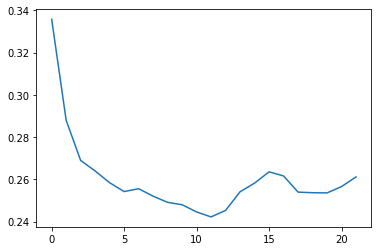

In [ ]:
# plot losses
from matplotlib import pyplot as plt
plt.plot(clf.history['loss'])

In [ ]:
print('Precision on test data is %.2f' % (precision_score(y_test, y_preds, average="macro",  zero_division=1)))

print('Recall on test data is %.2f' %recall_score(y_test, y_preds, average="macro", zero_division=1))

print('F1 Score on test data is %.2f' %f1_score(y_test, y_preds, average="macro", zero_division=1))

Precision on test data is 0.76
Recall on test data is 0.61
F1 Score on test data is 0.55


In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # plot losses
# plt.plot(clf1_nopreproc.history['loss'])

# # plot accuracy
# plt.plot(clf1_nopreproc.history['train_accuracy'])
# plt.plot(clf1_nopreproc.history['valid_accuracy'])

# find and plot feature importance
y_pred = clf1_nopreproc.predict(x_test)
clf1_nopreproc.feature_importances_
feat_importances = pd.Series(clf1_nopreproc.feature_importances_, index=feat.columns)
feat_importances.nlargest(20).plot(kind='barh')


# determine best accuracy for test set
preds = clf1_nopreproc.predict(x_test)
test_acc = accuracy_score(preds, y_test)

# determine best accuracy for validation set
preds_valid = clf1_nopreproc.predict(x_val)
valid_acc = accuracy_score(preds_valid, y_val)

print(f"BEST ACCURACY SCORE ON VALIDATION SET : {valid_acc}")
print(f"BEST ACCURACY SCORE ON TEST SET : {test_acc}")

AttributeError: ignored

Test XgBoost

In [ ]:
# import xgboost as xgb
# xgb_cl = xgb.XGBClassifier()
# type(xgb_cl)

In [ ]:
# xgb_cl.fit(X_train, y_train.values.ravel())

In [ ]:
# preds = xgb_cl.predict(X_test)

In [ ]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# accuracy_score(y_test, preds)

In [ ]:
# precision_score(y_test, preds, average="macro",  zero_division=1)

In [ ]:
recall_score(y_test, preds, average="macro", zero_division=1)

Test SVM

In [ ]:
# from sklearn import svm
# clf = svm.SVC(kernel='rbf')


In [ ]:
# clf.fit(X_train, y_train.values.ravel())
# y_pred = clf.predict(X_test)

In [ ]:
# accuracy_score(y_test, y_pred) 

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.datasets import imdb
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import LSTM
# from tensorflow.keras.layers import Embedding
# from tensorflow.keras.preprocessing import sequence
# # fix random seed for reproducibility
# tf.random.set_seed(7)

In [ ]:
# # create the model
# embedding_vecor_length = 32
# model = Sequential()
# model.add(LSTM(100))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model.summary())
# model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)